In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sonardataset.csv')

In [3]:
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
X=df.drop('Y',axis=1)

In [7]:
y=df['Y']

In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [9]:
scale=StandardScaler()
le=LabelEncoder()

In [10]:
X_scaled=scale.fit_transform(X)

In [11]:
y_scaled=le.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [14]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((166, 60), (166,), (42, 60), (42,))

In [15]:
model=Sequential()

In [16]:
model.add(Dense(32,activation='relu',input_shape=(X_train.shape[1],)))

In [17]:
model.add(Dense(16,activation='relu'))

In [18]:
model.add(Dense(8,activation='relu'))

In [19]:
model.add(Dense(1,activation='sigmoid'))

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.2,callbacks=early_stop)

Epoch 1/50
5/5 [==============================] - 0s 48ms/step - loss: 0.3396 - accuracy: 0.9318 - val_loss: 0.4657 - val_accuracy: 0.7941
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 0.3198 - accuracy: 0.9318 - val_loss: 0.4539 - val_accuracy: 0.8235
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 0.3006 - accuracy: 0.9318 - val_loss: 0.4410 - val_accuracy: 0.8235
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 0.2833 - accuracy: 0.9318 - val_loss: 0.4291 - val_accuracy: 0.8235
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 0.2668 - accuracy: 0.9318 - val_loss: 0.4202 - val_accuracy: 0.8235
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 0.2517 - accuracy: 0.9318 - val_loss: 0.4105 - val_accuracy: 0.8235
Epoch 7/50
5/5 [==============================] - 0s 19ms/step - loss: 0.2379 - accuracy: 0.9394 - val_loss: 0.4019 - val_accuracy: 0.8235
Epoch 8/50
5/5 [===========

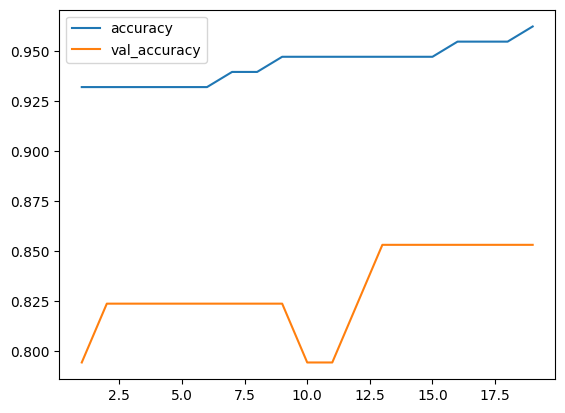

In [55]:
plt.plot(range(1,20),history.history['accuracy'])
plt.plot(range(1,20),history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [49]:
new_ypred = []

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        new_ypred.append(1)
    else:
        new_ypred.append(0)


In [51]:
round(accuracy_score(y_test,new_ypred),2)

0.76